# Correlación entre contaminantes

Se hace la correlación cruzada (cross correlation) entre los distintos contaminantes. Se saca un promedio de todas las estaciones.

In [2]:
# Se importan bibliotecas necesarias

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix

os.chdir("/home/pradel/Desktop/Forecast_CDMX_pollution/datasets/por_hora")

In [3]:
# Se importan los archivos csv

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [6]:
 #Se concatenan los archivos
cont_hora_todos = pd.concat([pd.read_csv(f) for f in all_filenames])

cont_hora_todos.to_csv("cont_hora_todos.csv", index=False, encoding = 'utf-8-sig')

In [4]:
# Se importa el archivo csv con los datos usando pandas

data = pd.read_csv("/home/pradel/Desktop/Forecast_CDMX_pollution/datasets/por_hora/cont_hora_todos.csv")

In [5]:
data.head()

,Unnamed: 0,fecha,hora,dia,mes,id_station,UVA,UVB,PA,CO,...,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0,2014-01-01 01:00:00,1,1,1,ACO,NaN,NaN,NaN,0.3,...,NaN,9.0,NaN,NaN,2.0,89.0,6.8,2.5,323.0,57.0
1,1,2014-01-01 01:00:00,1,1,1,ATI,NaN,NaN,NaN,0.5,...,20.0,9.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,69.0
2,2,2014-01-01 01:00:00,1,1,1,CAM,NaN,NaN,NaN,0.5,...,34.0,5.0,54.0,15.0,14.0,NaN,NaN,NaN,NaN,69.0
3,3,2014-01-01 01:00:00,1,1,1,CHO,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,5.0,84.0,9.4,1.1,61.0,84.0
4,5,2014-01-01 01:00:00,1,1,1,CUA,NaN,NaN,NaN,1.3,...,54.0,4.0,NaN,NaN,11.0,83.0,7.5,1.3,168.0,83.0


## Estructuración del dataframe

In [6]:
data = data.sort_values(by='fecha')

In [7]:
del data['Unnamed: 0']

In [8]:
del data['mes']

In [9]:
del data['dia']

In [10]:
del data['hora']

In [11]:
data = data.reset_index(drop = True)

In [12]:
data.head()

,fecha,id_station,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,2012-01-01 00:00:00,ACO,NaN,NaN,NaN,0.1,1.0,4.0,4.0,24.0,NaN,NaN,1.0,71.0,10.9,3.8,30.0,6.0
1,2012-01-01 00:00:00,TLA,0.0,0.0,NaN,0.2,7.0,26.0,33.0,8.0,9.0,7.0,4.0,71.0,11.5,2.5,346.0,16.0
2,2012-01-01 00:00:00,XAL,NaN,NaN,NaN,0.1,6.0,12.0,18.0,19.0,10.0,5.0,1.0,66.0,11.8,NaN,NaN,15.0
3,2012-01-01 00:00:00,TAH,NaN,NaN,NaN,0.7,2.0,15.0,18.0,10.0,NaN,NaN,1.0,73.0,9.9,NaN,NaN,23.0
4,2012-01-01 00:00:00,SUR,NaN,NaN,NaN,0.5,NaN,NaN,NaN,13.0,NaN,NaN,3.0,65.0,12.5,3.0,317.0,13.0


## Correlación entre los contaminantes

In [13]:
data = data.groupby('fecha', as_index = False).mean()

In [14]:
data = data.round(1)
data.head(5)

,fecha,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,2012-01-01 00:00:00,0.0,0.0,590.0,0.3,2.6,13.8,16.2,15.1,9.4,6.3,1.6,68.3,11.4,3.2,294.9,14.8
1,2012-01-01 01:00:00,0.0,0.0,587.0,1.4,30.0,39.8,69.5,5.5,77.0,136.9,7.2,68.8,9.7,1.4,180.0,174.3
2,2012-01-01 02:00:00,0.0,0.0,587.0,1.7,39.7,40.0,79.6,4.3,121.0,38.0,8.2,72.6,9.1,1.6,139.6,164.6
3,2012-01-01 03:00:00,0.0,0.0,587.0,1.8,40.8,39.1,79.6,4.6,125.1,36.7,7.6,74.1,8.6,1.1,232.6,172.9
4,2012-01-01 04:00:00,0.0,0.0,587.0,2.0,51.2,37.8,88.9,4.1,129.6,37.0,6.9,75.3,8.2,1.0,225.6,167.6


In [18]:
@interact
def correlaciones(X = list(data.select_dtypes('number').columns),
                  Y = list(data.select_dtypes('number').columns)):
        
    print(f"Correlación: {data[X].corr(data[Y])}")

interactive(children=(Dropdown(description='X', options=('UVA', 'UVB', 'PA', 'CO', 'NO', 'NO2', 'NOX', 'O3', '…

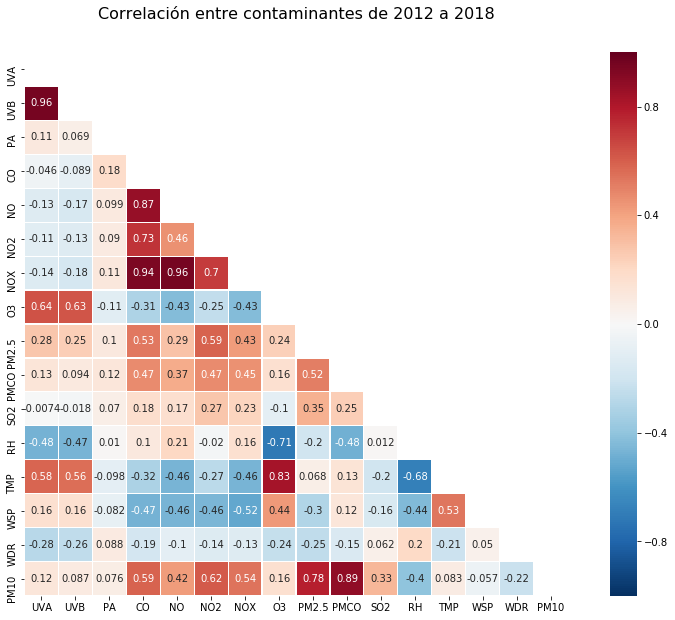

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación entre contaminantes de 2012 a 2018', y=1.05, size=16)

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(data.corr(), mask=mask, linewidths=0.1,vmin = -1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

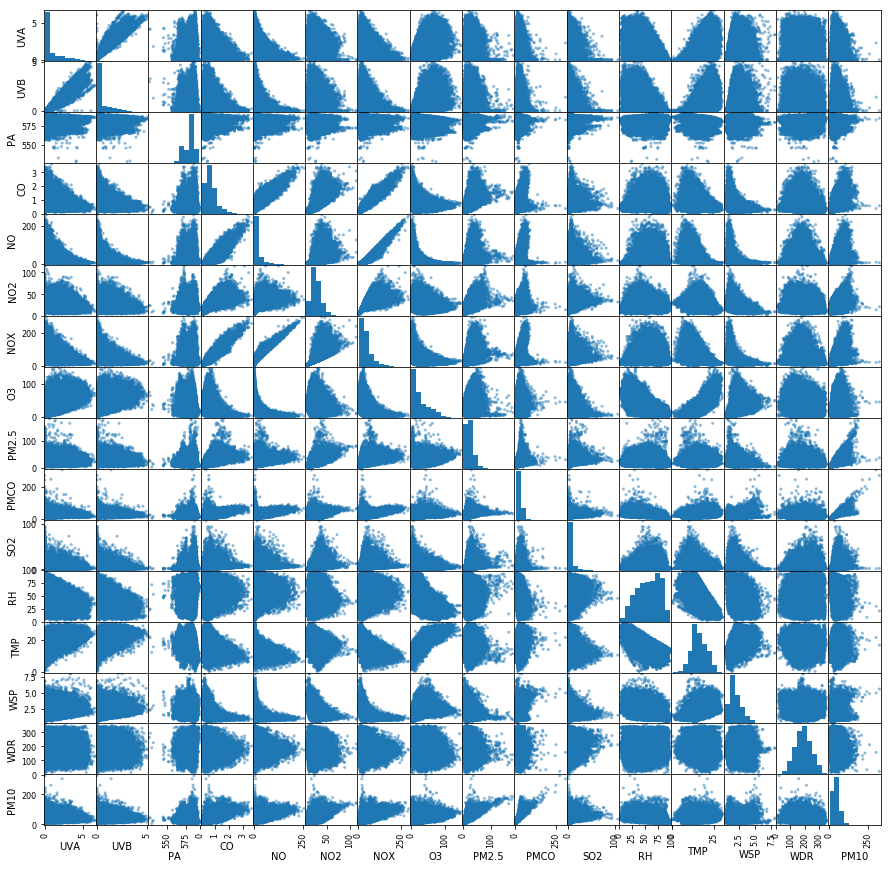

In [188]:
scatter_matrix(data, figsize=(15,15))
plt.show()

## Autocorrelación entre contaminantes

In [15]:
# Función para hacer el lag
def data_lag(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [16]:
NON_DER = ['date',]

In [17]:
data_72 = data_lag(data, 72, NON_DER)

In [18]:
data_72_corr = data_72.corr()

## Correlaciones entre PM10 y los demás contaminantes

In [19]:
O3_72 = data_72_corr[["O3"]]
O3_72.reset_index(inplace=True)

In [20]:
O3_72['indicador contaminante'] = O3_72['index'].astype(str).str[0:3]

In [21]:
O3_72

,index,O3,indicador contaminante
0,UVA,0.637839,UVA
1,UVB,0.630518,UVB
2,PA,-0.113144,PA
3,CO,-0.307126,CO
4,NO,-0.434313,NO
5,NO2,-0.248507,NO2
6,NOX,-0.431460,NOX
7,O3,1.000000,O3
8,PM2.5,0.236128,PM2
9,PMCO,0.157639,PMC


### O3 y UVA

In [22]:
uva = O3_72['indicador contaminante'] == "UVA"
O3_UVA_72 = O3_72[uva]

In [23]:
O3_UVA_72.reset_index(inplace = True, drop = True)

In [24]:
del O3_UVA_72['indicador contaminante']

In [25]:
O3_UVA_72 = O3_UVA_72.rename(columns = {'index' : 'Contaminante'})

In [26]:
O3_UVA_72['horas'] = O3_UVA_72.index
O3_UVA_72.head()

,Contaminante,O3,horas
0,UVA,0.637839,0
1,UVA_1,0.765117,1
2,UVA_2,0.802419,2
3,UVA_3,0.751004,3
4,UVA_4,0.626835,4


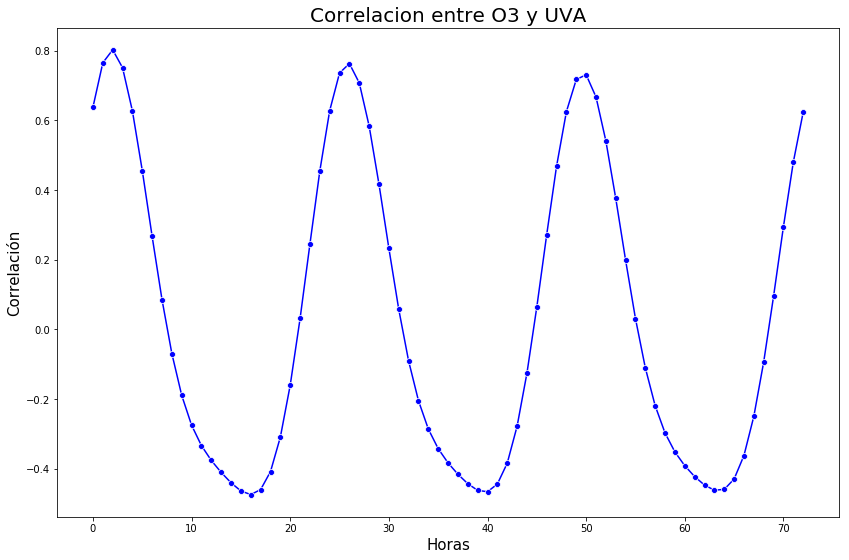

In [27]:
fig, ax = plt.subplots(figsize=(14,9))
o3_uva = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVA_72, marker = 'o',  color='b', ax=ax)
#sns.scatterplot(x = 'horas', y = 'PM10', data = PM10_UVA_72, markers= True,  color='b', ax=ax)

o3_uva.axes.set_title("Correlacion entre O3 y UVA",fontsize=20)
o3_uva.set_xlabel("Horas",fontsize=15)
o3_uva.set_ylabel("Correlación",fontsize=15)
o3_uva.tick_params(labelsize=10)
plt.show()

### O3 y UVB

In [28]:
O3_UVB_72 = O3_72[O3_72['indicador contaminante'].isin(['UVB'])]

In [29]:
O3_UVB_72.reset_index(inplace = True, drop = True)

In [30]:
del O3_UVB_72['indicador contaminante']

In [31]:
O3_UVB_72 = O3_UVB_72.rename(columns = {'index' : 'Contaminante'})

In [32]:
O3_UVB_72['horas'] = O3_UVB_72.index
O3_UVB_72.head()

,Contaminante,O3,horas
0,UVB,0.630518,0
1,UVB_1,0.754991,1
2,UVB_2,0.785276,2
3,UVB_3,0.723152,3
4,UVB_4,0.587265,4


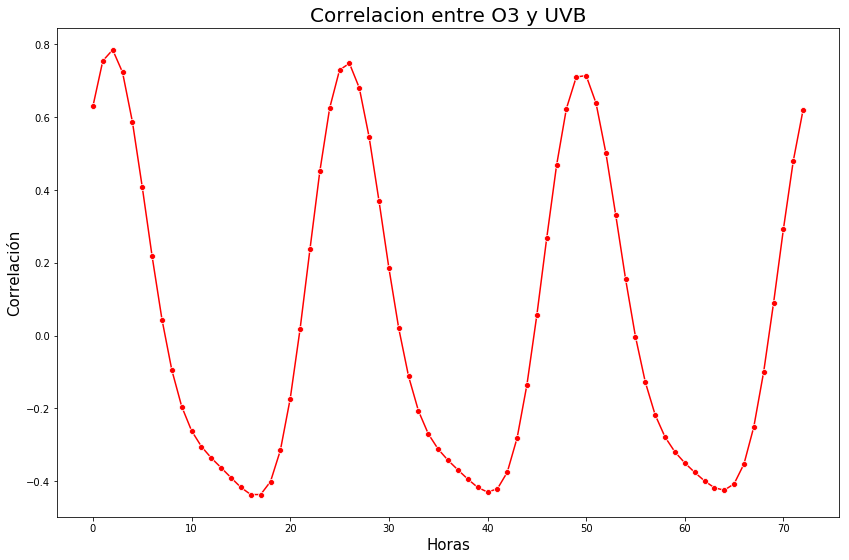

In [33]:
fig, ax = plt.subplots(figsize=(14,9))
o3_uvb = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVB_72, marker = 'o',  color='r', ax=ax)

o3_uvb.axes.set_title("Correlacion entre O3 y UVB",fontsize=20)
o3_uvb.set_xlabel("Horas",fontsize=15)
o3_uvb.set_ylabel("Correlación",fontsize=15)
o3_uvb.tick_params(labelsize=10)
plt.show()

### O3 y PA

In [34]:
O3_PA_72 = O3_72[O3_72['indicador contaminante'].isin(['PA', 'PA_'])]

In [35]:
O3_PA_72.reset_index(inplace = True, drop = True)

In [36]:
del O3_PA_72['indicador contaminante']

In [37]:
O3_PA_72 = O3_PA_72.rename(columns = {'index' : 'Contaminante'})

In [38]:
O3_PA_72['horas'] = O3_PA_72.index
O3_PA_72.head()

,Contaminante,O3,horas
0,PA,-0.113144,0
1,PA_1,-0.080702,1
2,PA_2,-0.047122,2
3,PA_3,-0.017447,3
4,PA_4,0.004856,4


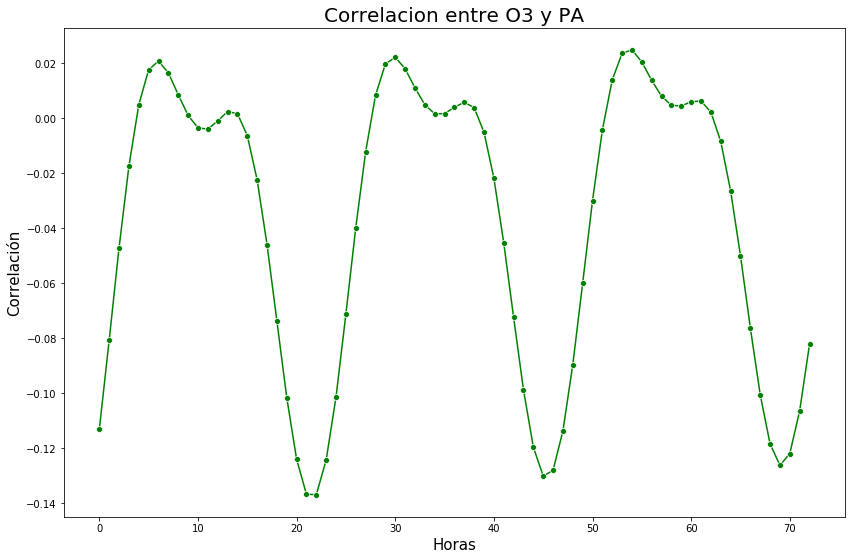

In [39]:
fig, ax = plt.subplots(figsize=(14,9))
o3_pa = sns.lineplot(x = 'horas', y = 'O3', data = O3_PA_72, marker = 'o',  color='g', ax=ax)

o3_pa.axes.set_title("Correlacion entre O3 y PA",fontsize=20)
o3_pa.set_xlabel("Horas",fontsize=15)
o3_pa.set_ylabel("Correlación",fontsize=15)
o3_pa.tick_params(labelsize=10)
plt.show()

### O3 y CO

In [40]:
O3_CO_72 = O3_72[O3_72['indicador contaminante'].isin(['CO', 'CO_'])]

In [41]:
O3_CO_72.reset_index(inplace = True, drop = True)

In [42]:
del O3_CO_72['indicador contaminante']

In [43]:
O3_CO_72 = O3_CO_72.rename(columns = {'index' : 'Contaminante'})

In [44]:
O3_CO_72['horas'] = O3_CO_72.index
O3_CO_72.head()

,Contaminante,O3,horas
0,CO,-0.307126,0
1,CO_1,-0.185708,1
2,CO_2,-0.026633,2
3,CO_3,0.147279,3
4,CO_4,0.303889,4


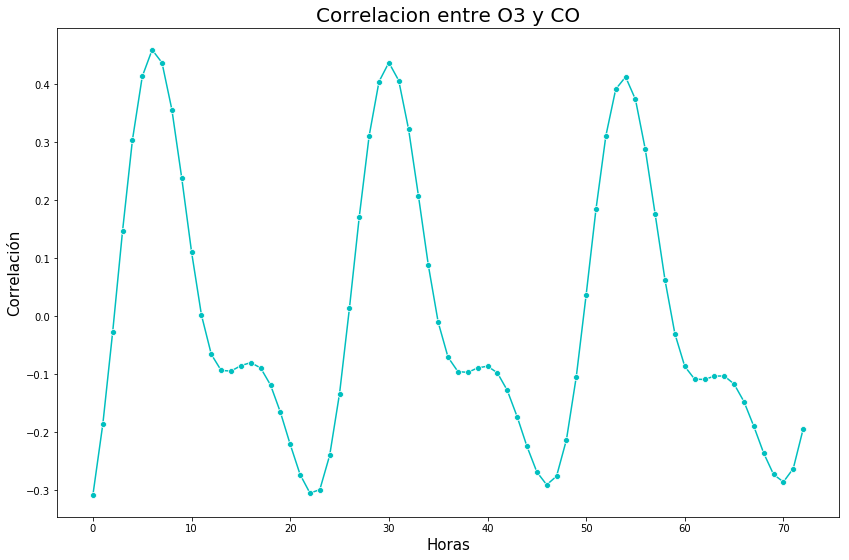

In [45]:
fig, ax = plt.subplots(figsize=(14,9))
o3_co = sns.lineplot(x = 'horas', y = 'O3', data = O3_CO_72, marker = 'o',  color='c', ax=ax)

o3_co.axes.set_title("Correlacion entre O3 y CO",fontsize=20)
o3_co.set_xlabel("Horas",fontsize=15)
o3_co.set_ylabel("Correlación",fontsize=15)
o3_co.tick_params(labelsize=10)
plt.show()

### O3 y NO

In [46]:
O3_NO_72 = O3_72[O3_72['indicador contaminante'].isin(['NO', 'NO_'])]

In [47]:
O3_NO_72.reset_index(inplace = True, drop = True)

In [48]:
del O3_NO_72['indicador contaminante']

In [49]:
O3_NO_72 = O3_NO_72.rename(columns = {'index' : 'Contaminante'})

In [50]:
O3_NO_72['horas'] = O3_NO_72.index
O3_NO_72.head()

,Contaminante,O3,horas
0,NO,-0.434313,0
1,NO_1,-0.324120,1
2,NO_2,-0.160734,2
3,NO_3,0.037981,3
4,NO_4,0.238007,4


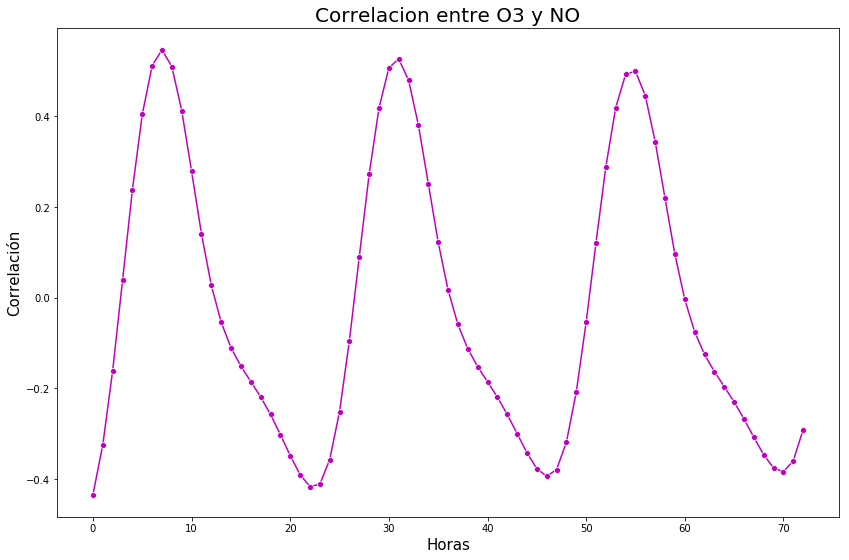

In [51]:
fig, ax = plt.subplots(figsize=(14,9))
o3_no = sns.lineplot(x = 'horas', y = 'O3', data = O3_NO_72, marker = 'o',  color='m', ax=ax)

o3_no.axes.set_title("Correlacion entre O3 y NO",fontsize=20)
o3_no.set_xlabel("Horas",fontsize=15)
o3_no.set_ylabel("Correlación",fontsize=15)
o3_no.tick_params(labelsize=10)
plt.show()

### O3 y NO2

In [52]:
O3_NO2_72 = O3_72[O3_72['indicador contaminante'].isin(['NO2'])]

In [53]:
O3_NO2_72.reset_index(inplace = True, drop = True)

In [54]:
del O3_NO2_72['indicador contaminante']

In [55]:
O3_NO2_72 = O3_NO2_72.rename(columns = {'index' : 'Contaminante'})

In [56]:
O3_NO2_72['horas'] = O3_NO2_72.index
O3_NO2_72.head()

,Contaminante,O3,horas
0,NO2,-0.248507,0
1,NO2_1,-0.147038,1
2,NO2_2,-0.025243,2
3,NO2_3,0.093016,3
4,NO2_4,0.187485,4


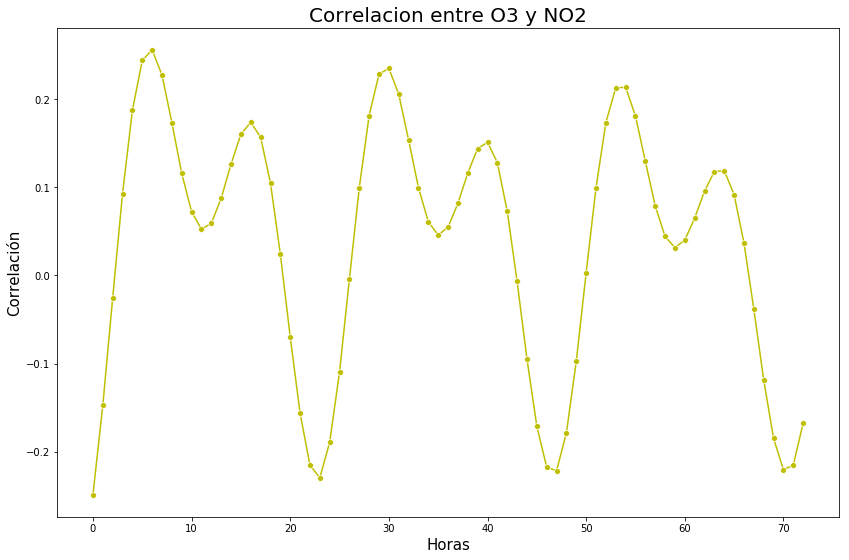

In [57]:
fig, ax = plt.subplots(figsize=(14,9))
o3_no2 = sns.lineplot(x = 'horas', y = 'O3', data = O3_NO2_72, marker = 'o',  color='y', ax=ax)

o3_no2.axes.set_title("Correlacion entre O3 y NO2",fontsize=20)
o3_no2.set_xlabel("Horas",fontsize=15)
o3_no2.set_ylabel("Correlación",fontsize=15)
o3_no2.tick_params(labelsize=10)
plt.show()

### O3 y NOX

In [58]:
O3_NOX_72 = O3_72[O3_72['indicador contaminante'].isin(['NOX'])]

In [59]:
O3_NOX_72.reset_index(inplace = True, drop = True)

In [60]:
del O3_NOX_72['indicador contaminante']

In [61]:
O3_NOX_72 = O3_NOX_72.rename(columns = {'index' : 'Contaminante'})

In [62]:
O3_NOX_72['horas'] = O3_NOX_72.index
O3_NOX_72.head()

,Contaminante,O3,horas
0,NOX,-0.431460,0
1,NOX_1,-0.309422,1
2,NOX_2,-0.137854,2
3,NOX_3,0.061036,3
4,NOX_4,0.253198,4


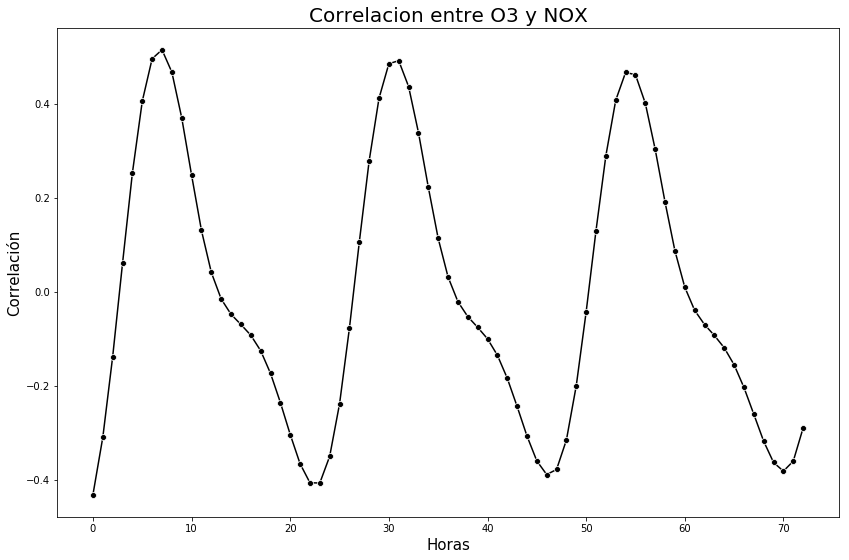

In [63]:
fig, ax = plt.subplots(figsize=(14,9))
o3_nox = sns.lineplot(x = 'horas', y = 'O3', data = O3_NOX_72, marker = 'o',  color='k', ax=ax)

o3_nox.axes.set_title("Correlacion entre O3 y NOX",fontsize=20)
o3_nox.set_xlabel("Horas",fontsize=15)
o3_nox.set_ylabel("Correlación",fontsize=15)
o3_nox.tick_params(labelsize=10)
plt.show()

### O3 y O3

In [64]:
O3_O3_72 = O3_72[O3_72['indicador contaminante'].isin(['O3', 'O3_'])]

In [65]:
O3_O3_72.reset_index(inplace = True, drop = True)

In [66]:
del O3_O3_72['indicador contaminante']

In [67]:
O3_O3_72 = O3_O3_72.rename(columns = {'index' : 'Contaminante'})

In [68]:
O3_O3_72['horas'] = O3_O3_72.index
O3_O3_72.head()

,Contaminante,O3,horas
0,O3,1.000000,0
1,O3_1,0.940698,1
2,O3_2,0.797727,2
3,O3_3,0.600658,3
4,O3_4,0.380821,4


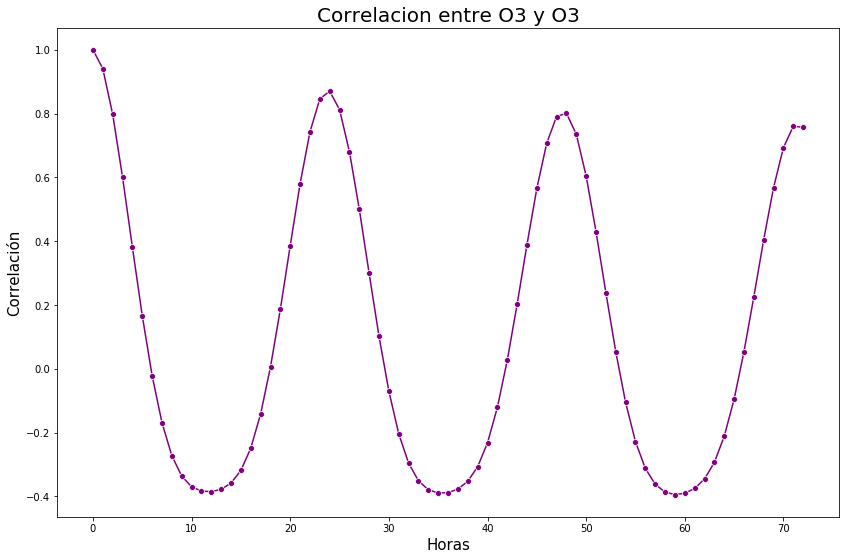

In [69]:
fig, ax = plt.subplots(figsize=(14,9))
o3_o3 = sns.lineplot(x = 'horas', y = 'O3', data = O3_O3_72, marker = 'o',  color='#800080', ax=ax)

o3_o3.axes.set_title("Correlacion entre O3 y O3",fontsize=20)
o3_o3.set_xlabel("Horas",fontsize=15)
o3_o3.set_ylabel("Correlación",fontsize=15)
o3_o3.tick_params(labelsize=10)
plt.show()

### O3 y PM2.5

In [70]:
O3_PM25_72 = O3_72[O3_72['indicador contaminante'].isin(['PM2', 'PM2.5'])]

In [71]:
O3_PM25_72.reset_index(inplace = True, drop = True)

In [72]:
del O3_PM25_72['indicador contaminante']

In [73]:
O3_PM25_72 = O3_PM25_72.rename(columns = {'index' : 'Contaminante'})

In [74]:
O3_PM25_72['horas'] = O3_PM25_72.index
O3_PM25_72.head()

,Contaminante,O3,horas
0,PM2.5,0.236128,0
1,PM2.5_1,0.339028,1
2,PM2.5_2,0.416837,2
3,PM2.5_3,0.463512,3
4,PM2.5_4,0.475369,4


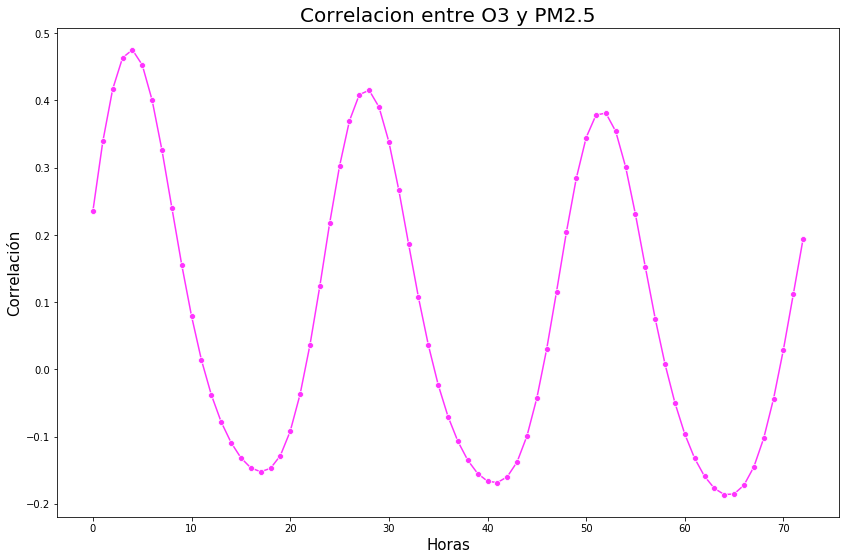

In [75]:
fig, ax = plt.subplots(figsize=(14,9))
o3_pm25 = sns.lineplot(x = 'horas', y = 'O3', data = O3_PM25_72, marker = 'o',  color='#ff33ff', ax=ax)

o3_pm25.axes.set_title("Correlacion entre O3 y PM2.5",fontsize=20)
o3_pm25.set_xlabel("Horas",fontsize=15)
o3_pm25.set_ylabel("Correlación",fontsize=15)
o3_pm25.tick_params(labelsize=10)
plt.show()

### O3 Y PMCO

In [76]:
O3_PMCO_72 = O3_72[O3_72['indicador contaminante'].isin(['PMC'])]

In [77]:
O3_PMCO_72.reset_index(inplace = True, drop = True)

In [78]:
del O3_PMCO_72['indicador contaminante']

In [79]:
O3_PMCO_72 = O3_PMCO_72.rename(columns = {'index' : 'Contaminante'})

In [80]:
O3_PMCO_72['horas'] = O3_PMCO_72.index
O3_PMCO_72.head()

,Contaminante,O3,horas
0,PMCO,0.157639,0
1,PMCO_1,0.186335,1
2,PMCO_2,0.230587,2
3,PMCO_3,0.275272,3
4,PMCO_4,0.304647,4


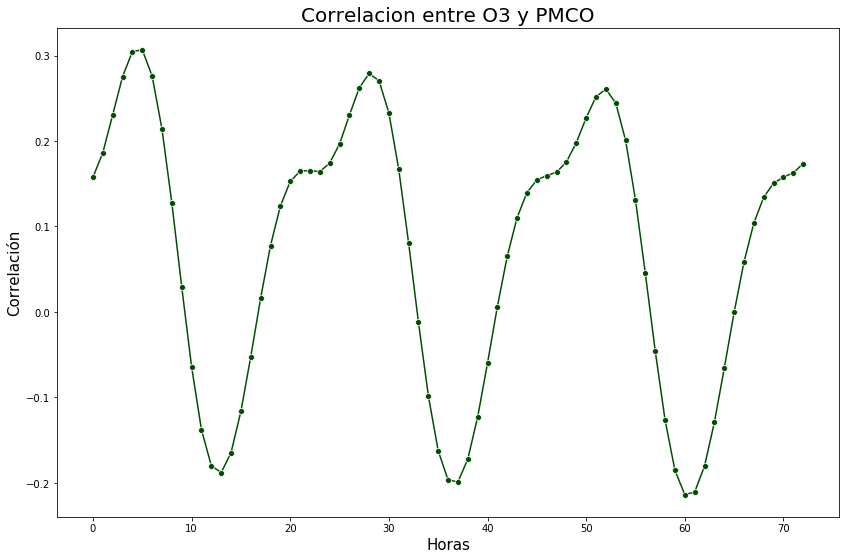

In [81]:
fig, ax = plt.subplots(figsize=(14,9))
o3_pmco = sns.lineplot(x = 'horas', y = 'O3', data = O3_PMCO_72, marker = 'o',  color='#004d00', ax=ax)

o3_pmco.axes.set_title("Correlacion entre O3 y PMCO",fontsize=20)
o3_pmco.set_xlabel("Horas",fontsize=15)
o3_pmco.set_ylabel("Correlación",fontsize=15)
o3_pmco.tick_params(labelsize=10)
plt.show()

### O3 Y SO2

In [82]:
O3_SO2_72 = O3_72[O3_72['indicador contaminante'].isin(['SO2'])]

In [83]:
O3_SO2_72.reset_index(inplace = True, drop = True)

In [84]:
del O3_SO2_72['indicador contaminante']

In [85]:
O3_SO2_72 = O3_SO2_72.rename(columns = {'index' : 'Contaminante'})

In [86]:
O3_SO2_72['horas'] = O3_SO2_72.index
O3_SO2_72.head()

,Contaminante,O3,horas
0,SO2,-0.100684,0
1,SO2_1,-0.055020,1
2,SO2_2,-0.005294,2
3,SO2_3,0.043611,3
4,SO2_4,0.084618,4


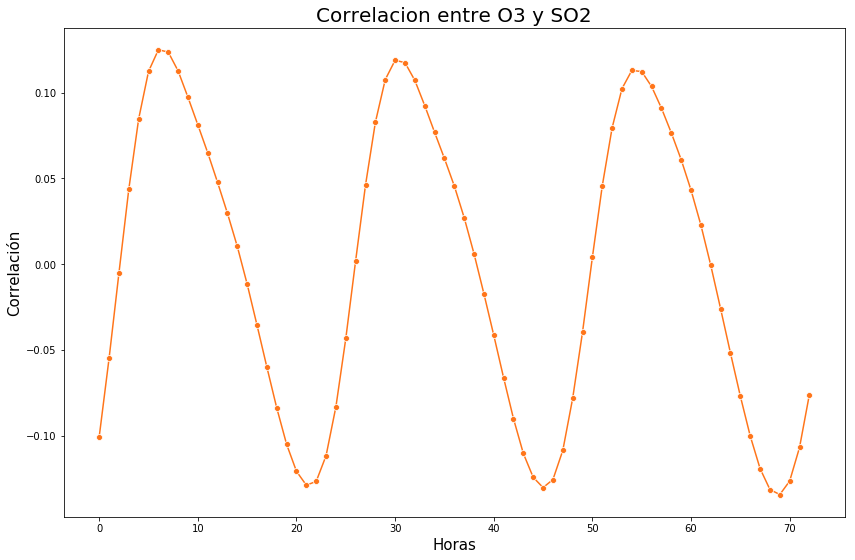

In [87]:
fig, ax = plt.subplots(figsize=(14,9))
o3_so2 = sns.lineplot(x = 'horas', y = 'O3', data = O3_SO2_72, marker = 'o',  color='#ff751a', ax=ax)

o3_so2.axes.set_title("Correlacion entre O3 y SO2",fontsize=20)
o3_so2.set_xlabel("Horas",fontsize=15)
o3_so2.set_ylabel("Correlación",fontsize=15)
o3_so2.tick_params(labelsize=10)
plt.show()

### O3 y RH

In [88]:
O3_RH_72 = O3_72[O3_72['indicador contaminante'].isin(['RH', 'RH_'])]

In [89]:
O3_RH_72.reset_index(inplace = True, drop = True)

In [90]:
del O3_RH_72['indicador contaminante']

In [91]:
O3_RH_72 = O3_RH_72.rename(columns = {'index' : 'Contaminante'})

In [92]:
O3_RH_72['horas'] = O3_RH_72.index
O3_RH_72.head()

,Contaminante,O3,horas
0,RH,-0.713090,0
1,RH_1,-0.671755,1
2,RH_2,-0.579908,2
3,RH_3,-0.449511,3
4,RH_4,-0.296354,4


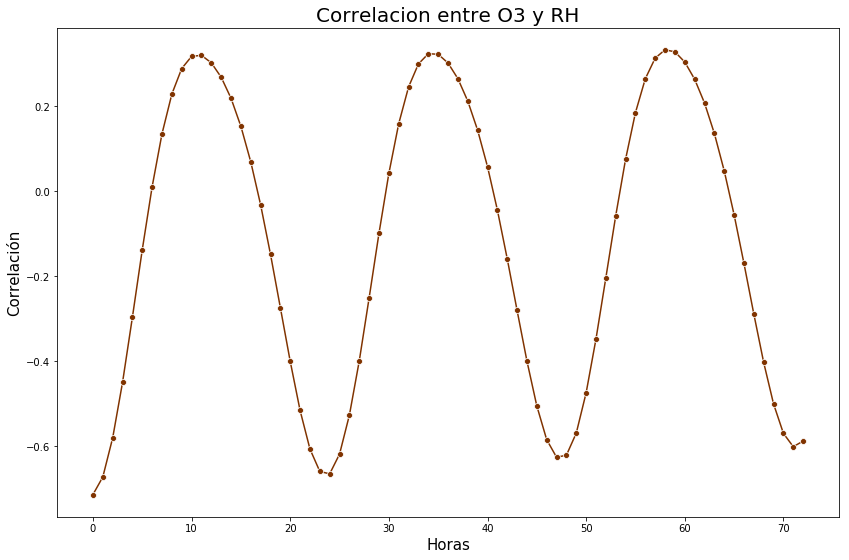

In [93]:
fig, ax = plt.subplots(figsize=(14,9))
o3_rh = sns.lineplot(x = 'horas', y = 'O3', data = O3_RH_72, marker = 'o',  color='#803300', ax=ax)

o3_rh.axes.set_title("Correlacion entre O3 y RH",fontsize=20)
o3_rh.set_xlabel("Horas",fontsize=15)
o3_rh.set_ylabel("Correlación",fontsize=15)
o3_rh.tick_params(labelsize=10)
plt.show()

### O3 y TMP

In [94]:
O3_TMP_72 = O3_72[O3_72['indicador contaminante'].isin(['TMP'])]

In [95]:
O3_TMP_72.reset_index(inplace = True, drop = True)

In [96]:
del O3_TMP_72['indicador contaminante']

In [97]:
O3_TMP_72 = O3_TMP_72.rename(columns = {'index' : 'Contaminante'})

In [98]:
O3_TMP_72['horas'] = O3_TMP_72.index
O3_TMP_72.head()

,Contaminante,O3,horas
0,TMP,0.828244,0
1,TMP_1,0.773338,1
2,TMP_2,0.655619,2
3,TMP_3,0.490207,3
4,TMP_4,0.296866,4


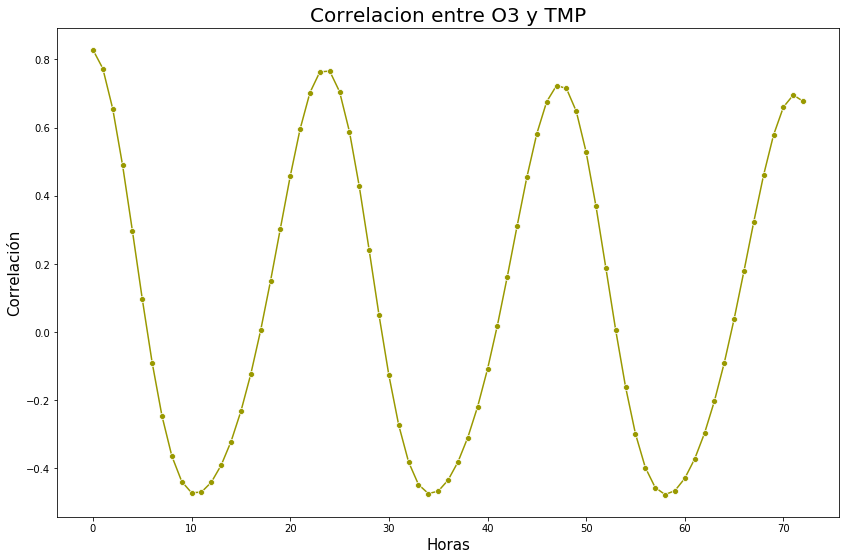

In [99]:
fig, ax = plt.subplots(figsize=(14,9))
o3_tmp = sns.lineplot(x = 'horas', y = 'O3', data = O3_TMP_72, marker = 'o',  color='#999900', ax=ax)

o3_tmp.axes.set_title("Correlacion entre O3 y TMP",fontsize=20)
o3_tmp.set_xlabel("Horas",fontsize=15)
o3_tmp.set_ylabel("Correlación",fontsize=15)
o3_tmp.tick_params(labelsize=10)
plt.show()

### O3 Y WSP

In [100]:
O3_WSP_72 = O3_72[O3_72['indicador contaminante'].isin(['WSP'])]

In [101]:
O3_WSP_72.reset_index(inplace = True, drop = True)

In [102]:
del O3_WSP_72['indicador contaminante']

In [103]:
O3_WSP_72 = O3_WSP_72.rename(columns = {'index' : 'Contaminante'})

In [104]:
O3_WSP_72['horas'] = O3_WSP_72.index
O3_WSP_72.head()

,Contaminante,O3,horas
0,WSP,0.435946,0
1,WSP_1,0.310206,1
2,WSP_2,0.179039,2
3,WSP_3,0.043928,3
4,WSP_4,-0.088042,4


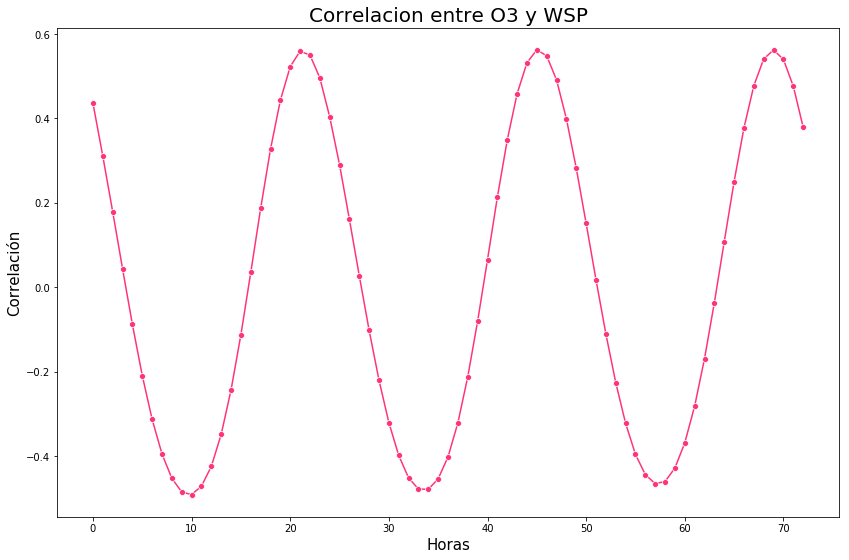

In [105]:
fig, ax = plt.subplots(figsize=(14,9))
o3_wsp = sns.lineplot(x = 'horas', y = 'O3', data = O3_WSP_72, marker = 'o',  color='#ff3377', ax=ax)

o3_wsp.axes.set_title("Correlacion entre O3 y WSP",fontsize=20)
o3_wsp.set_xlabel("Horas",fontsize=15)
o3_wsp.set_ylabel("Correlación",fontsize=15)
o3_wsp.tick_params(labelsize=10)
plt.show()

### O3 y WDR

In [106]:
O3_WDR_72 = O3_72[O3_72['indicador contaminante'].isin(['WDR'])]

In [107]:
O3_WDR_72.reset_index(inplace = True, drop = True)

In [108]:
del O3_WDR_72['indicador contaminante']

In [109]:
O3_WDR_72 = O3_WDR_72.rename(columns = {'index' : 'Contaminante'})

In [110]:
O3_WDR_72['horas'] = O3_WDR_72.index
O3_WDR_72.head()

,Contaminante,O3,horas
0,WDR,-0.240342,0
1,WDR_1,-0.302206,1
2,WDR_2,-0.341931,2
3,WDR_3,-0.354826,3
4,WDR_4,-0.341393,4


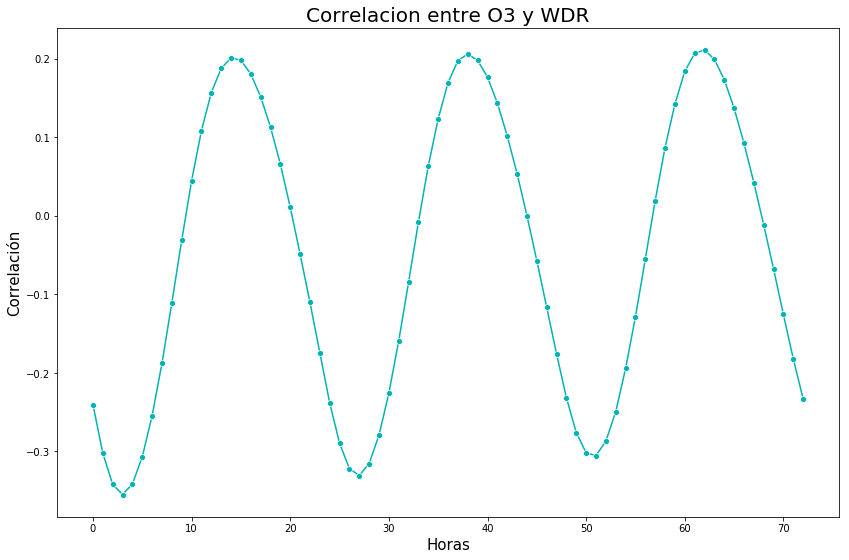

In [111]:
fig, ax = plt.subplots(figsize=(14,9))
o3_wdr = sns.lineplot(x = 'horas', y = 'O3', data = O3_WDR_72, marker = 'o',  color='#00b3b3', ax=ax)

o3_wdr.axes.set_title("Correlacion entre O3 y WDR",fontsize=20)
o3_wdr.set_xlabel("Horas",fontsize=15)
o3_wdr.set_ylabel("Correlación",fontsize=15)
o3_wdr.tick_params(labelsize=10)
plt.show()

### O3 Y PM10

In [112]:
O3_PM10_72 = O3_72[O3_72['indicador contaminante'].isin(['PM1', 'PM10'])]

In [113]:
O3_PM10_72.reset_index(inplace = True, drop = True)

In [114]:
del O3_PM10_72['indicador contaminante']

In [115]:
O3_PM10_72 = O3_PM10_72.rename(columns = {'index' : 'Contaminante'})

In [116]:
O3_PM10_72['horas'] = O3_PM10_72.index
O3_PM10_72.head()

,Contaminante,O3,horas
0,PM10,0.163479,0
1,PM10_1,0.216998,1
2,PM10_2,0.282632,2
3,PM10_3,0.344972,3
4,PM10_4,0.387392,4


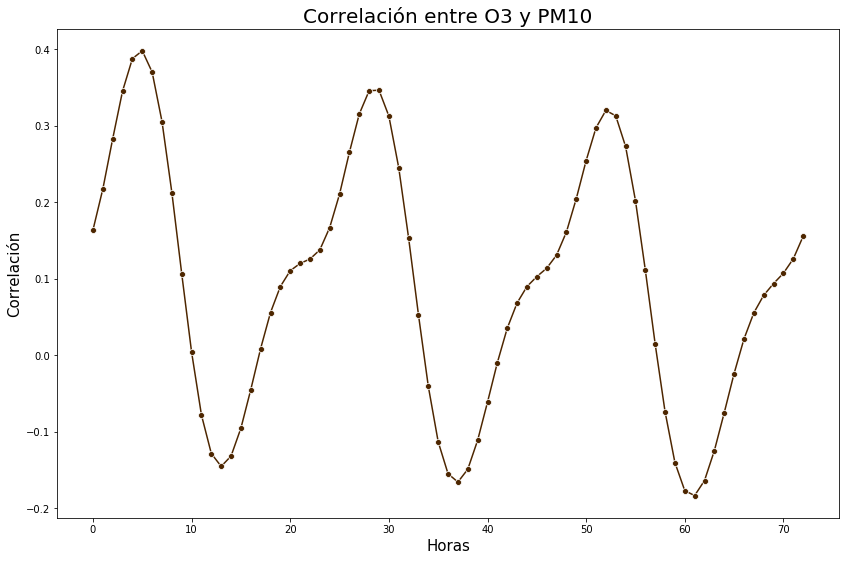

In [117]:
fig, ax = plt.subplots(figsize=(14,9))
o3_pm10 = sns.lineplot(x = 'horas', y = 'O3', data = O3_PM10_72, marker = 'o',  color='#4d2600', ax=ax)

o3_pm10.axes.set_title("Correlación entre O3 y PM10",fontsize=20)
o3_pm10.set_xlabel("Horas",fontsize=15)
o3_pm10.set_ylabel("Correlación",fontsize=15)
o3_pm10.tick_params(labelsize=10)
plt.show()

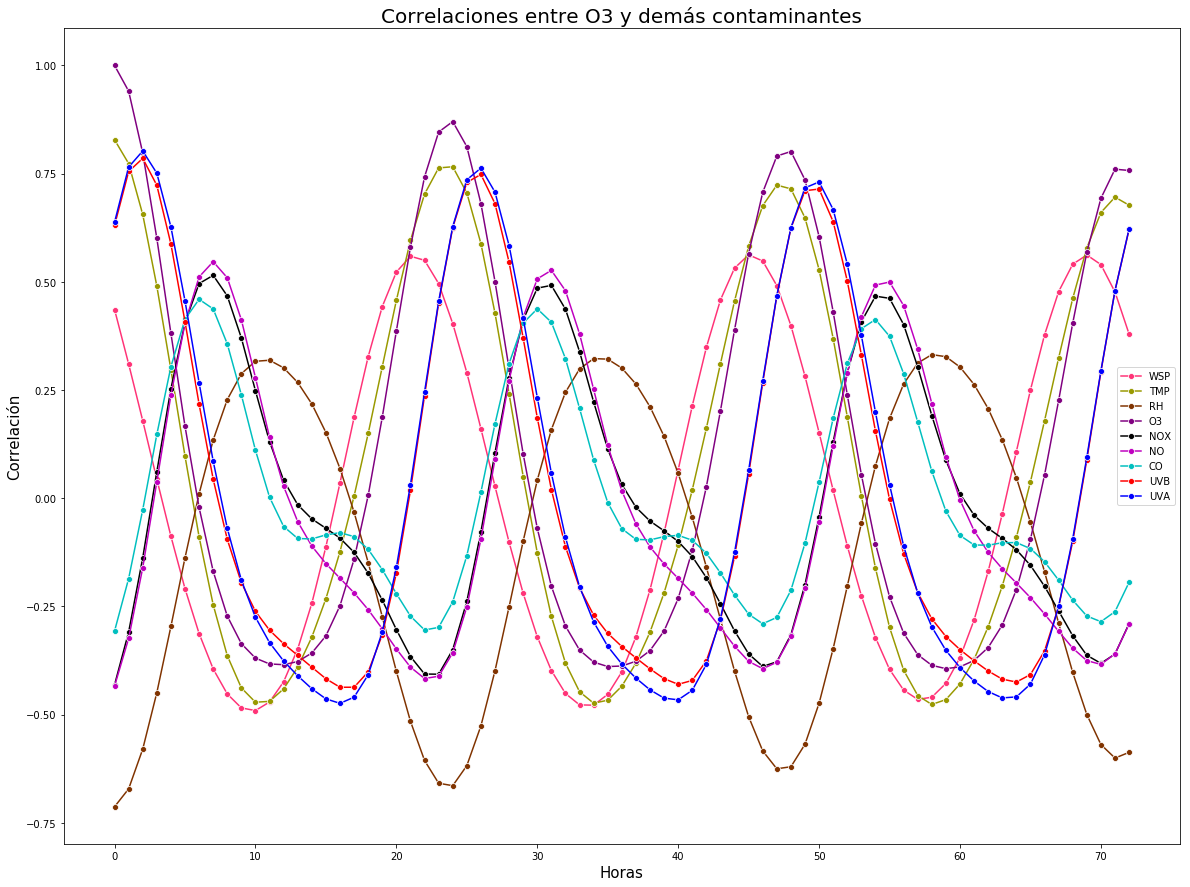

In [118]:
fig, ax = plt.subplots(figsize=(20,15))

o3_wsp = sns.lineplot(x = 'horas', y = 'O3', data = O3_WSP_72, marker = 'o',  color='#ff3377', ax=ax)
o3_tmp = sns.lineplot(x = 'horas', y = 'O3', data = O3_TMP_72, marker = 'o',  color='#999900', ax=ax)
o3_rh = sns.lineplot(x = 'horas', y = 'O3', data = O3_RH_72, marker = 'o',  color='#803300', ax=ax)
o3_o3 = sns.lineplot(x = 'horas', y = 'O3', data = O3_O3_72, marker = 'o',  color='#800080', ax=ax)
o3_nox = sns.lineplot(x = 'horas', y = 'O3', data = O3_NOX_72, marker = 'o',  color='k', ax=ax)
o3_no = sns.lineplot(x = 'horas', y = 'O3', data = O3_NO_72, marker = 'o',  color='m', ax=ax)
o3_co = sns.lineplot(x = 'horas', y = 'O3', data = O3_CO_72, marker = 'o',  color='c', ax=ax)
o3_uvb = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVB_72, marker = 'o',  color='r', ax=ax)
o3_uva = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVA_72, marker = 'o',  color='b', ax=ax)

# ax.set_xticklabels(O3_UVB_72['horas'])
ax.legend(['WSP', 'TMP', 'RH','O3', 'NOX','NO', 'CO','UVB', 'UVA'], facecolor='w')
ax.set_title('Correlaciones entre O3 y demás contaminantes', fontsize=20)
ax.set_ylabel('Correlación' , fontsize=15)
ax.set_xlabel('Horas', fontsize=15)

plt.show()

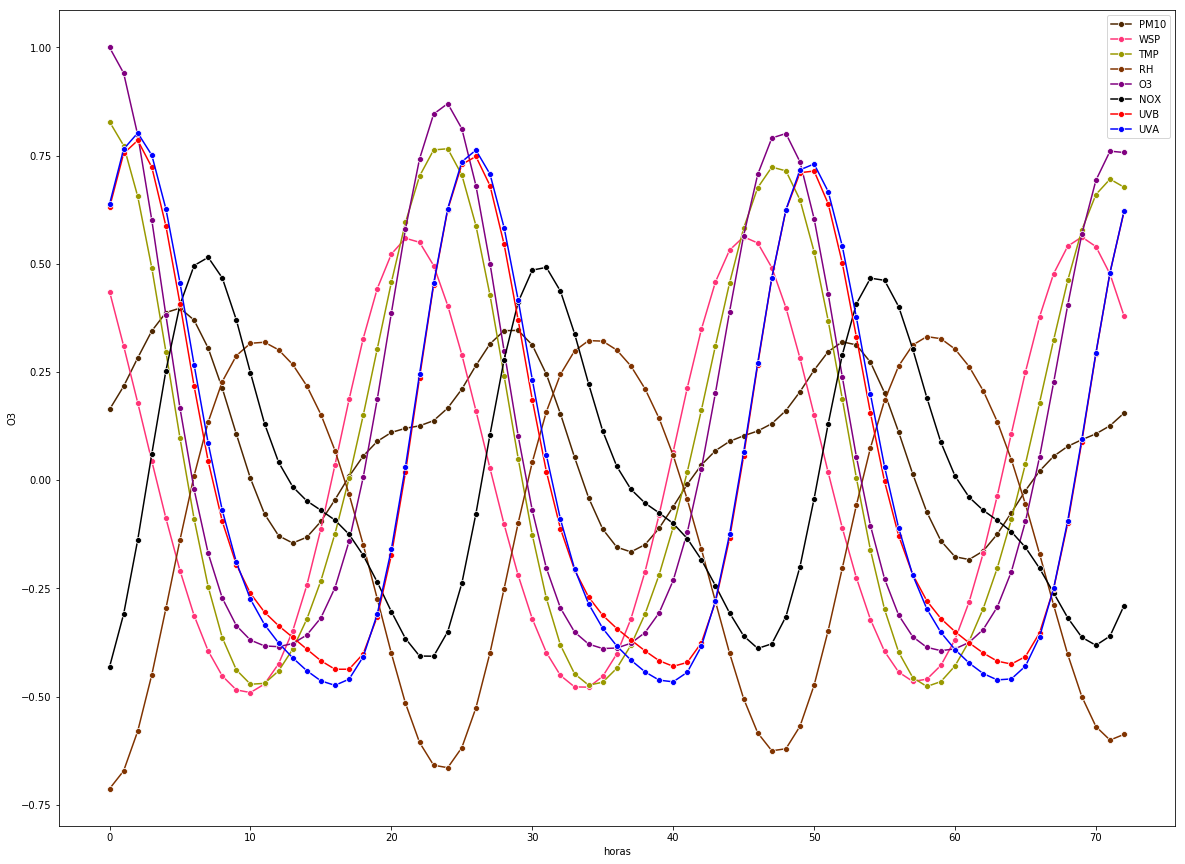

In [139]:
fig, ax = plt.subplots(figsize=(20,15))

o3_pm10 = sns.lineplot(x = 'horas', y = 'O3', data = O3_PM10_72, marker = 'o',  color='#4d2600', ax=ax)
o3_wsp = sns.lineplot(x = 'horas', y = 'O3', data = O3_WSP_72, marker = 'o',  color='#ff3377', ax=ax)
o3_tmp = sns.lineplot(x = 'horas', y = 'O3', data = O3_TMP_72, marker = 'o',  color='#999900', ax=ax)
o3_rh = sns.lineplot(x = 'horas', y = 'O3', data = O3_RH_72, marker = 'o',  color='#803300', ax=ax)
o3_o3 = sns.lineplot(x = 'horas', y = 'O3', data = O3_O3_72, marker = 'o',  color='#800080', ax=ax)
o3_nox = sns.lineplot(x = 'horas', y = 'O3', data = O3_NOX_72, marker = 'o',  color='k', ax=ax)
o3_uvb = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVB_72, marker = 'o',  color='r', ax=ax)
o3_uva = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVA_72, marker = 'o',  color='b', ax=ax)

# ax.set_xticklabels(O3_UVB_72['horas'])
ax.legend(['PM10','WSP', 'TMP', 'RH', 'O3', 'NOX','UVB', 'UVA'], facecolor='w')
plt.show()

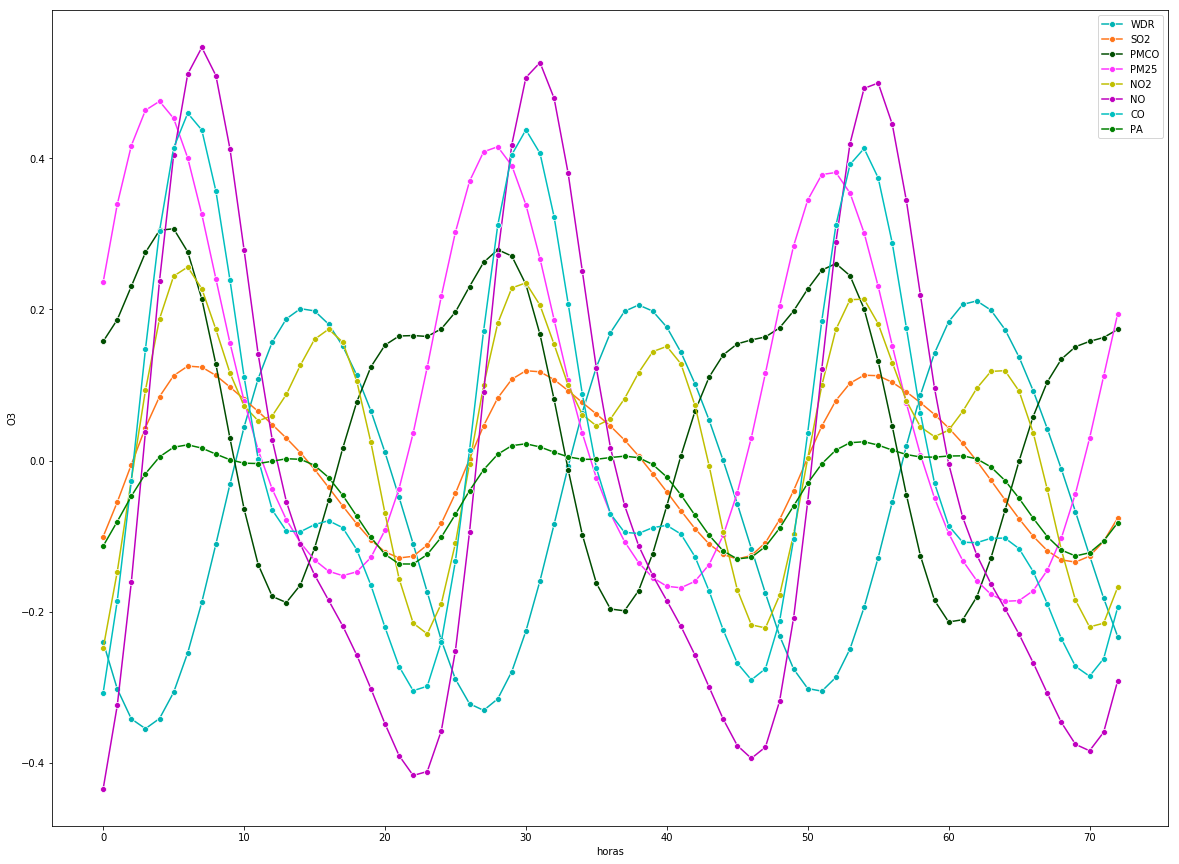

In [140]:
fig, ax = plt.subplots(figsize=(20,15))

o3_wdr = sns.lineplot(x = 'horas', y = 'O3', data = O3_WDR_72, marker = 'o',  color='#00b3b3', ax=ax)
o3_so2 = sns.lineplot(x = 'horas', y = 'O3', data = O3_SO2_72, marker = 'o',  color='#ff751a', ax=ax)
o3_pmco = sns.lineplot(x = 'horas', y = 'O3', data = O3_PMCO_72, marker = 'o',  color='#004d00', ax=ax)
o3_pm25 = sns.lineplot(x = 'horas', y = 'O3', data = O3_PM25_72, marker = 'o',  color='#ff33ff', ax=ax)
o3_no2 = sns.lineplot(x = 'horas', y = 'O3', data = O3_NO2_72, marker = 'o',  color='y', ax=ax)
o3_no = sns.lineplot(x = 'horas', y = 'O3', data = O3_NO_72, marker = 'o',  color='m', ax=ax)
o3_co = sns.lineplot(x = 'horas', y = 'O3', data = O3_CO_72, marker = 'o',  color='c', ax=ax)
o3_pa = sns.lineplot(x = 'horas', y = 'O3', data = O3_PA_72, marker = 'o',  color='g', ax=ax)

# ax.set_xticklabels(O3_UVB_72['horas'])
ax.legend(['WDR','SO2', 'PMCO', 'PM25','NO2', 'NO', 'CO', 'PA'], facecolor='w')
plt.show()